### Script pour interpreter les résultats du benchmark

In [20]:
import matplotlib 
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json
from random import randint
from math import atan
from glob import glob

In [2]:
def carte(matched,positions,vt,meta):
    
    fresque = cv2.imread(meta['base_dir']+'fresque_small{}.ppm'.format(meta['fresque_id']))
    
    fig,ax = plt.subplots()
    ax.imshow(fresque)
    for i in range(len(matched)):
        if(matched[i]==1):
            #ax.arrow(vt[i][0],vt[i][1],p[i][0]-vt[i][0],p[i][1]-vt[i][1])
            ax.plot([vt[i][0],p[i][0]],[vt[i][1],p[i][1]],marker='D',color='red')
            ax.plot([vt[i][0]],[vt[i][1]],marker='D',color='green')
    fig.show()

In [16]:
results_filename = './results_bench/results_bench_f2_01-31_16-13_0001'

<IPython.core.display.Javascript object>


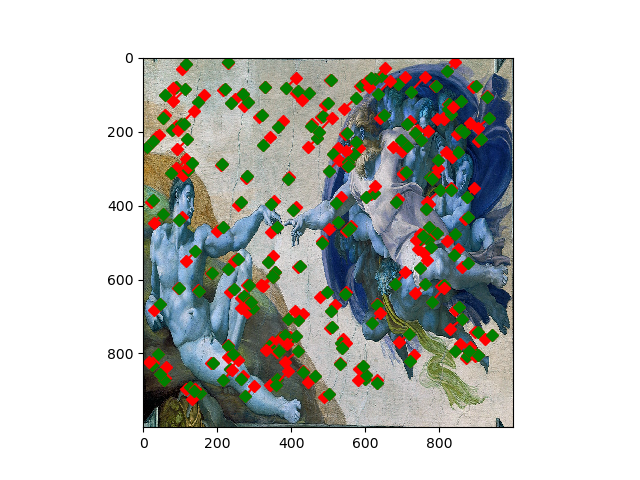

Benchmark de la fresque 2:
Moyenne de placement trouvé:...0.905
Moyenne de distance:...........17.816950351628197
Distance Min - Max:............0.0 - 55.9
Ecart type des distances:......14.385627555571421


In [19]:
with open(results_filename,'r') as f:
    res = json.loads(f.readline())

m = res['matched']
d = res['distances']
p = res['positions']
v = res['vt']

carte(m,p,v,res['meta'])


d = [np.linalg.norm((v[i][0]-p[i][0],v[i][1]-p[i][1])) if m[i]==1 else 0 for i in range(len(v))]


# Affiche quelques stats:
print("Benchmark de la fresque {}:".format(res['meta']['fresque_id']))
print("Moyenne de placement trouvé:...{}".format(np.average(m)))
print("Moyenne de distance:...........{}".format(np.average(d)))
print("Distance Min - Max:............{:.3} - {:.3}".format(np.min(d),np.max(d)))
print("Ecart type des distances:......{}".format(np.std(d)))


5 5


<IPython.core.display.Javascript object>


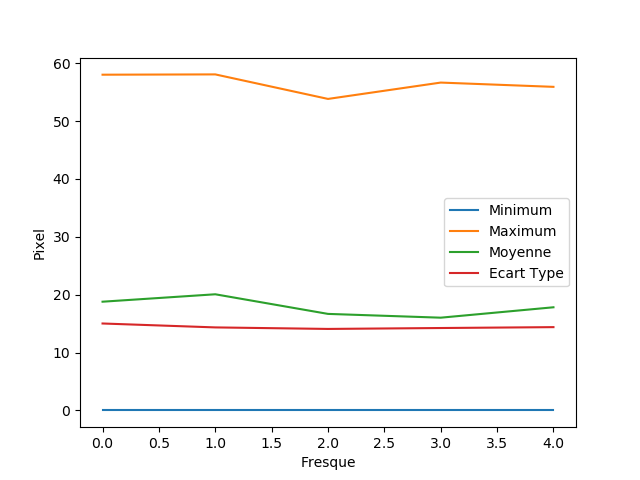

In [38]:
results_filenames = './results_bench/results_bench_f*_*0001'
results_paths = glob(results_filenames)
ab = np.arange(0,len(results_paths),1)


maxi,mini,moyennes,ets = [], [], [], []

for path in results_paths:
    with open(path,'r') as f:
        res = json.loads(f.readline())
    
    m = res['matched']
    p = res['positions']
    v = res['vt']
    d = [np.linalg.norm((v[i][0]-p[i][0],v[i][1]-p[i][1])) if m[i]==1 else 0 for i in range(len(v))]
    maxi.append(np.max(d))
    mini.append(np.min(d))
    moyennes.append(np.average(d))
    ets.append(np.std(d))

    
print(len(ab),len(maxi))
fig,ax = plt.subplots(1,1)
ax.plot(ab,mini,label="Minimum")
ax.plot(ab,maxi,label="Maximum")
ax.plot(ab,moyennes,label="Moyenne")
ax.plot(ab,ets,label="Ecart Type")

ax.legend(loc='best')
ax.set_xlabel("Fresque")
ax.set_ylabel("Pixel")

plt.show()